In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pwd

'C:\\Users\\Mayank Singh\\Desktop\\Stuff\\ML_Couse_Content\\Supervised Learning Project'

In [5]:
df = pd.read_csv("Telecomm_Customer_Churn_Prediction\Telco-Customer-Churn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [12]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

## GRAPHS

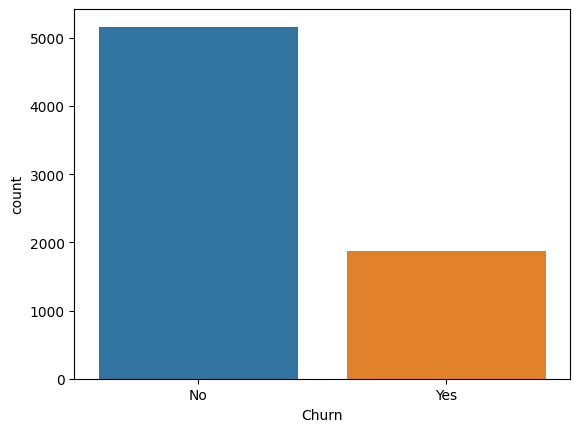

In [15]:
sns.countplot(data = df,x = 'Churn',hue = 'Churn');

<Axes: xlabel='Churn', ylabel='TotalCharges'>

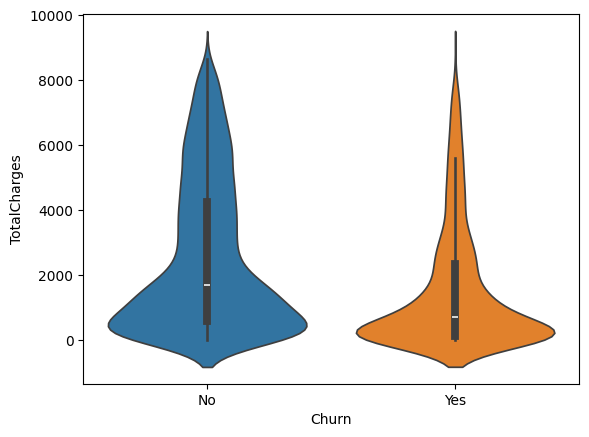

In [17]:
sns.violinplot(data = df,x = 'Churn',y = "TotalCharges",hue = 'Churn')

<Axes: xlabel='Contract', ylabel='TotalCharges'>

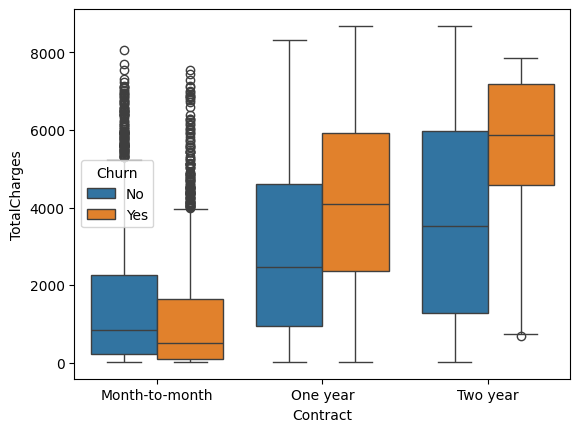

In [20]:
sns.boxplot(data = df,y = 'TotalCharges', x = 'Contract',hue = 'Churn');

In [23]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]).corr()

In [26]:
churn_yes = corr_df['Churn_Yes'].sort_values().iloc[1:-1]
churn_yes

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

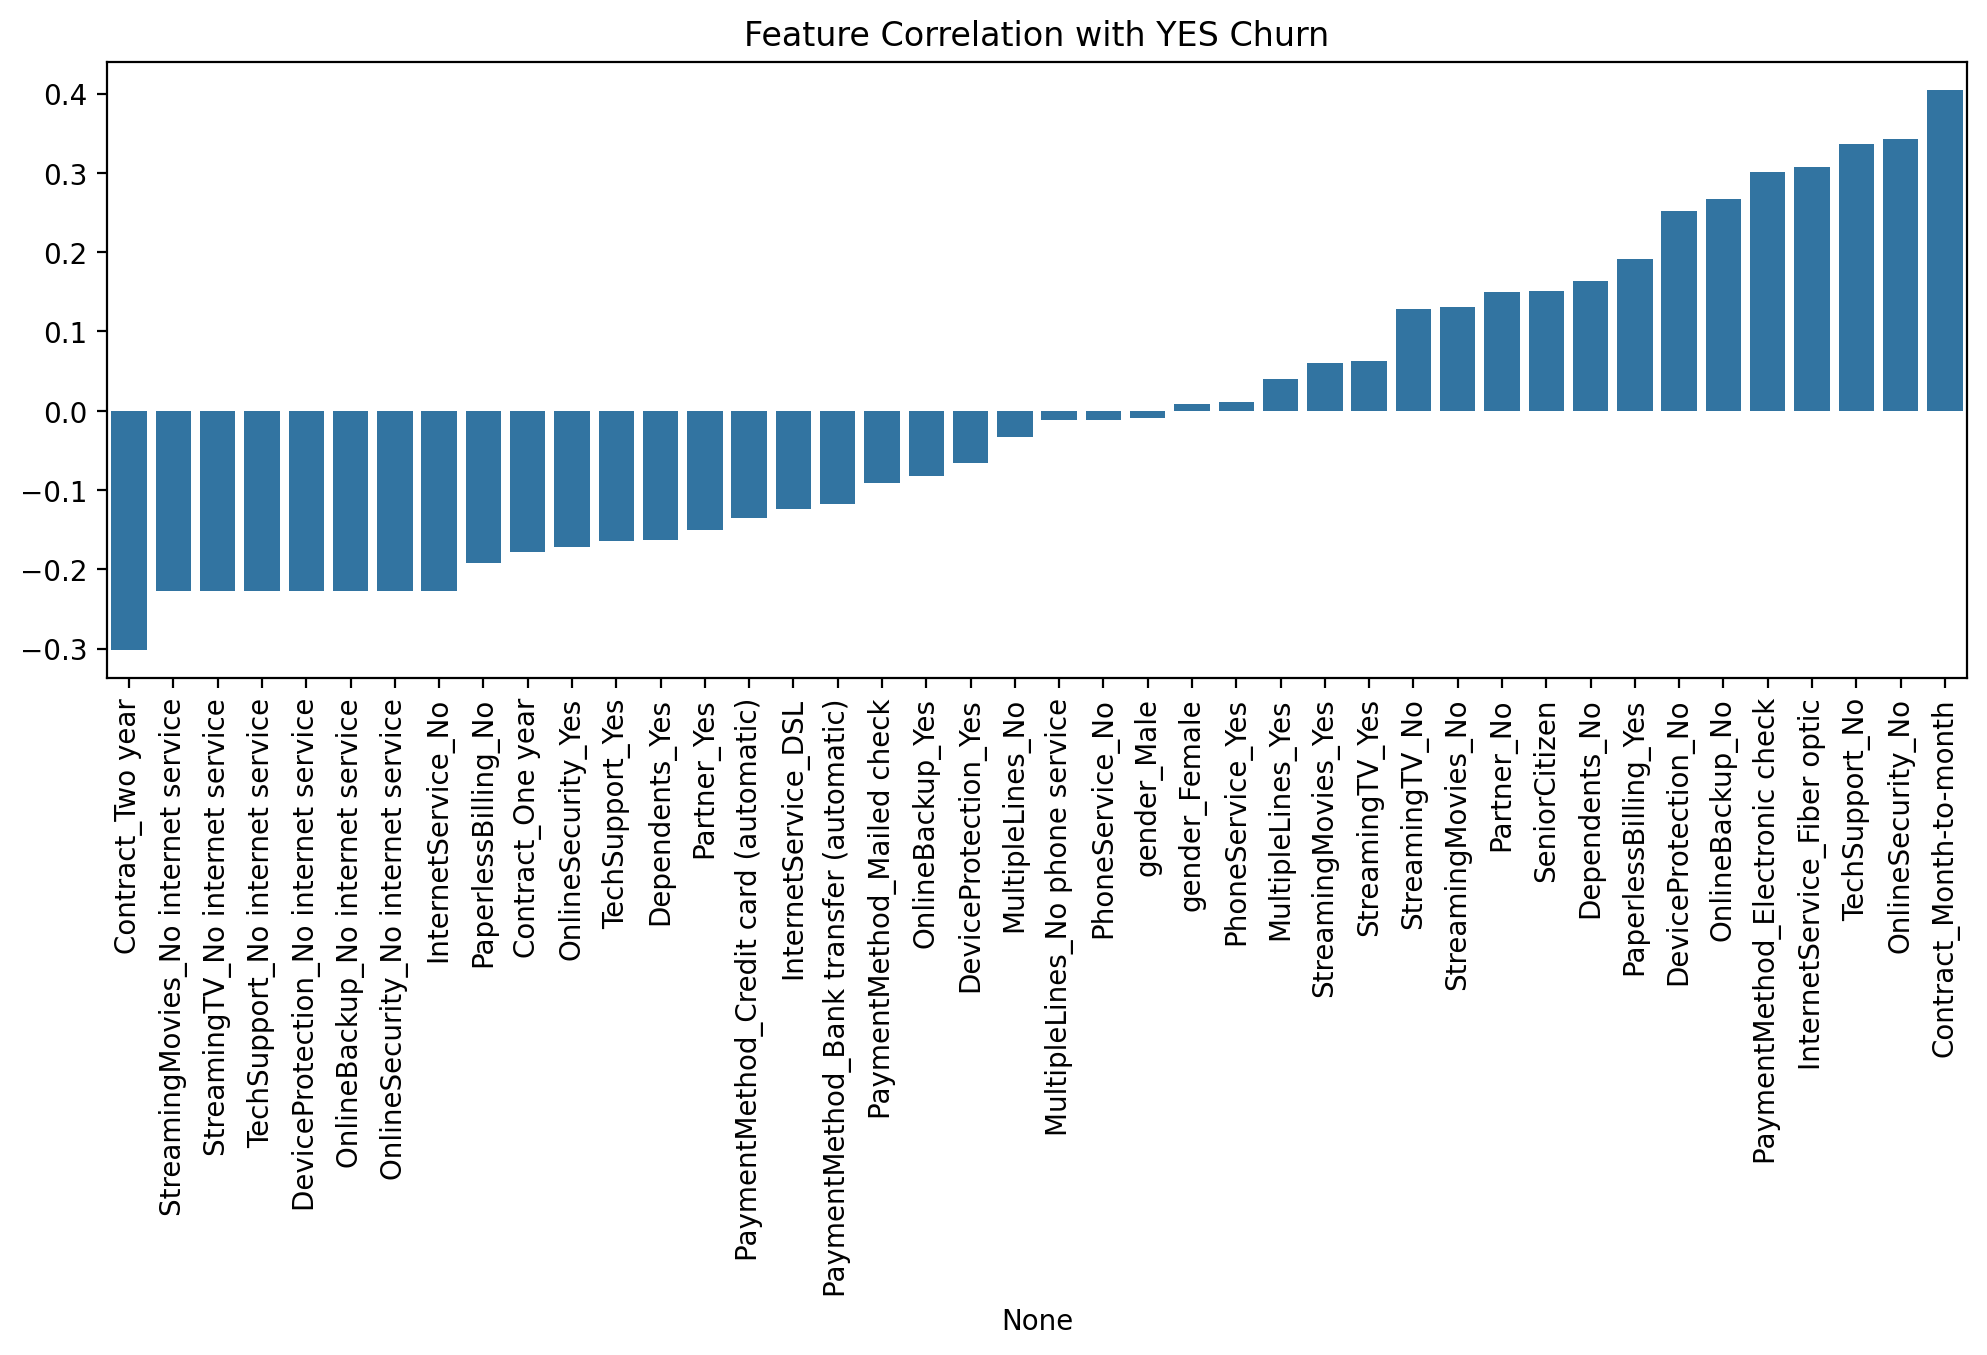

In [38]:
plt.figure(figsize = (12,4),dpi = 200)
plt.title("Feature Correlation with YES Churn")
sns.barplot(x = churn_yes.index , y = churn_yes.values)
plt.xticks(rotation=90);

<Axes: xlabel='tenure', ylabel='Count'>

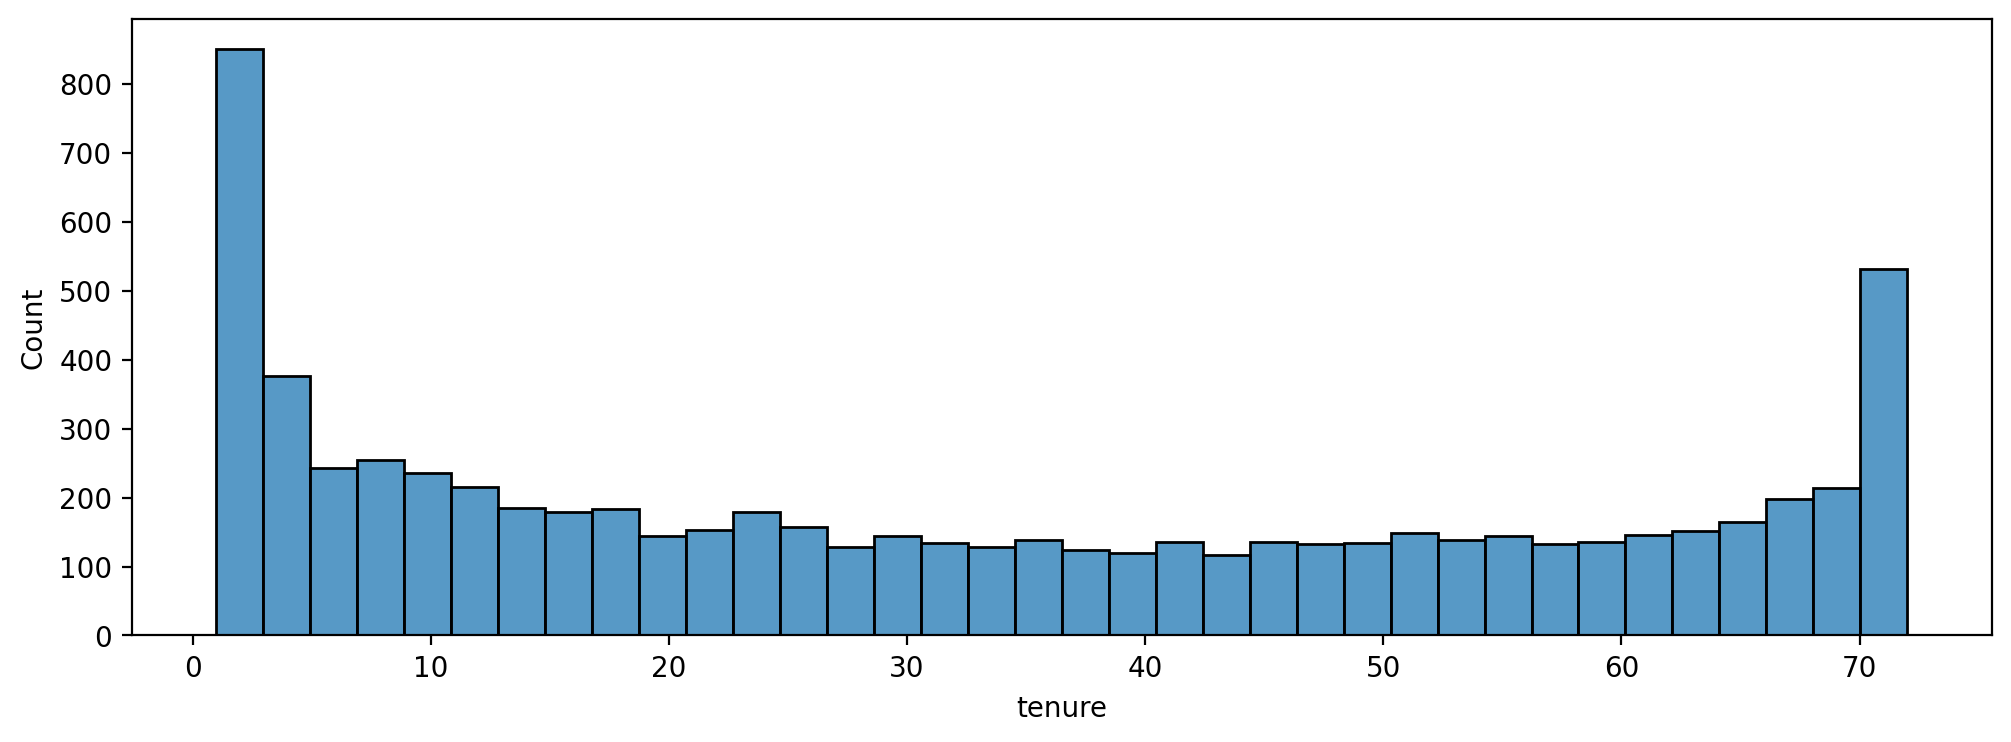

In [59]:
plt.figure(figsize = (12,4), dpi = 200)
sns.histplot(data = df,x = 'tenure',bins = 36)

C:\Users\Mayank Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


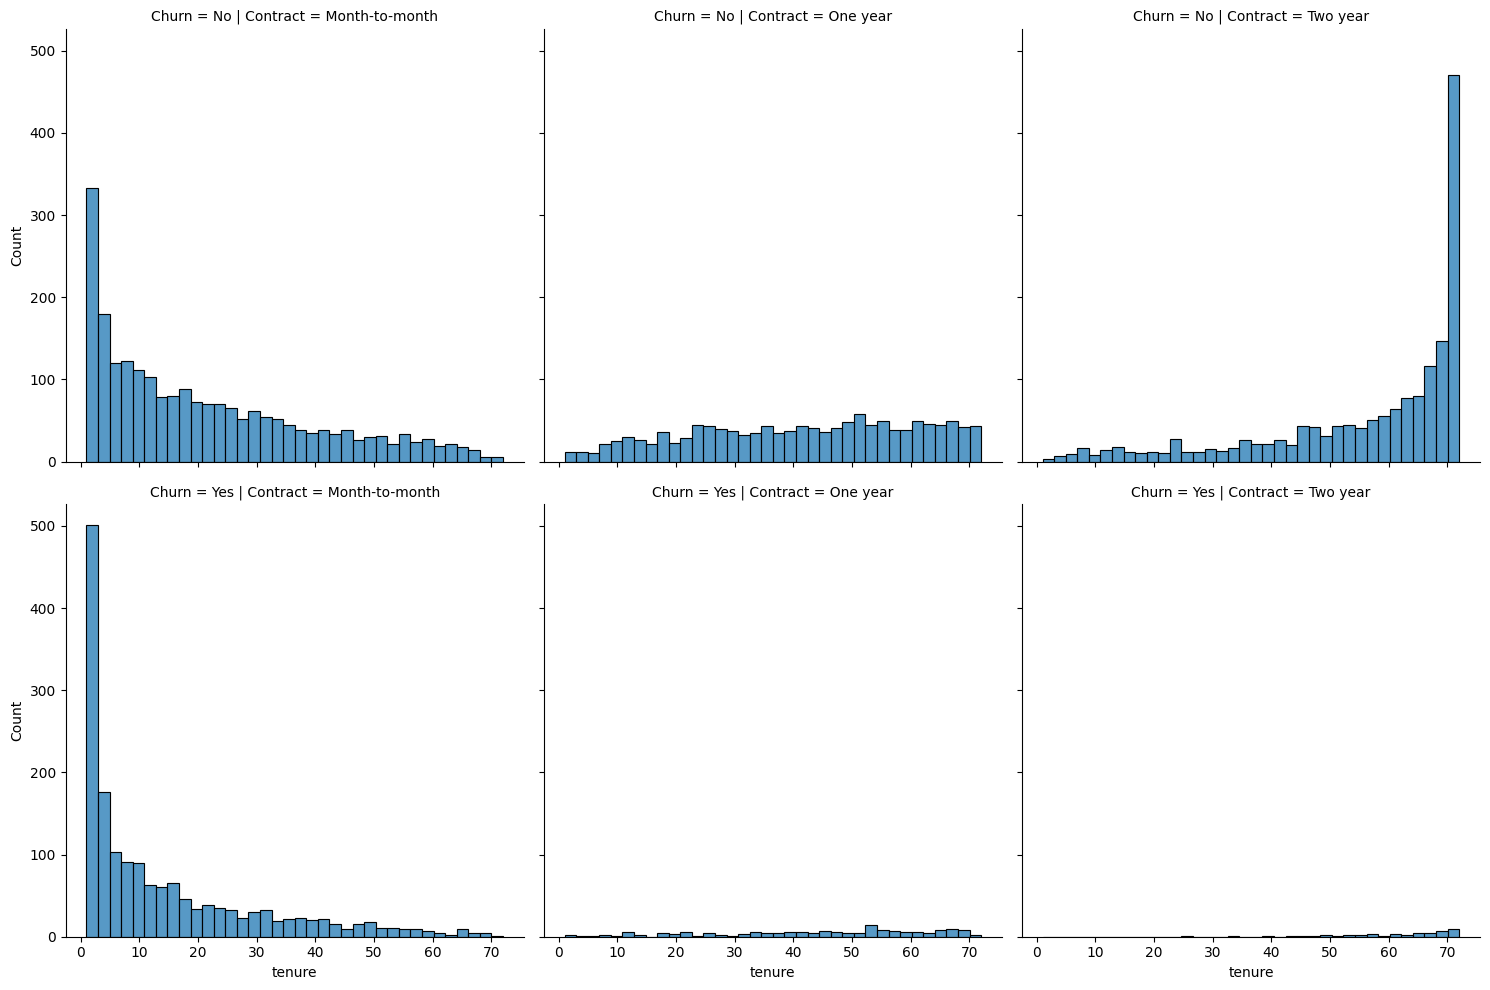

In [60]:
sns.displot(data = df,x ='tenure',bins = 36,row = 'Churn',col = 'Contract');

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

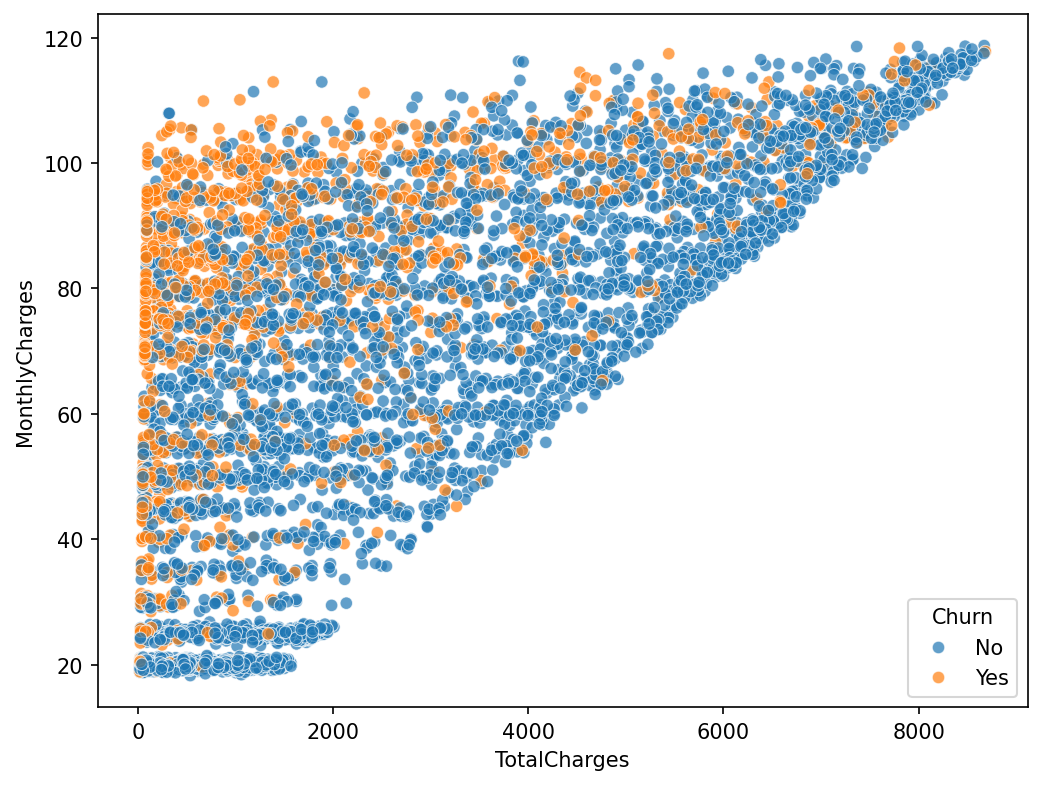

In [68]:
plt.figure(figsize = (8,6),dpi = 150)
sns.scatterplot(data =df,x = "TotalCharges" , y='MonthlyCharges',hue = 'Churn',alpha = 0.7)

### Creating Cohorts based on Tenure

In [112]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [113]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [114]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

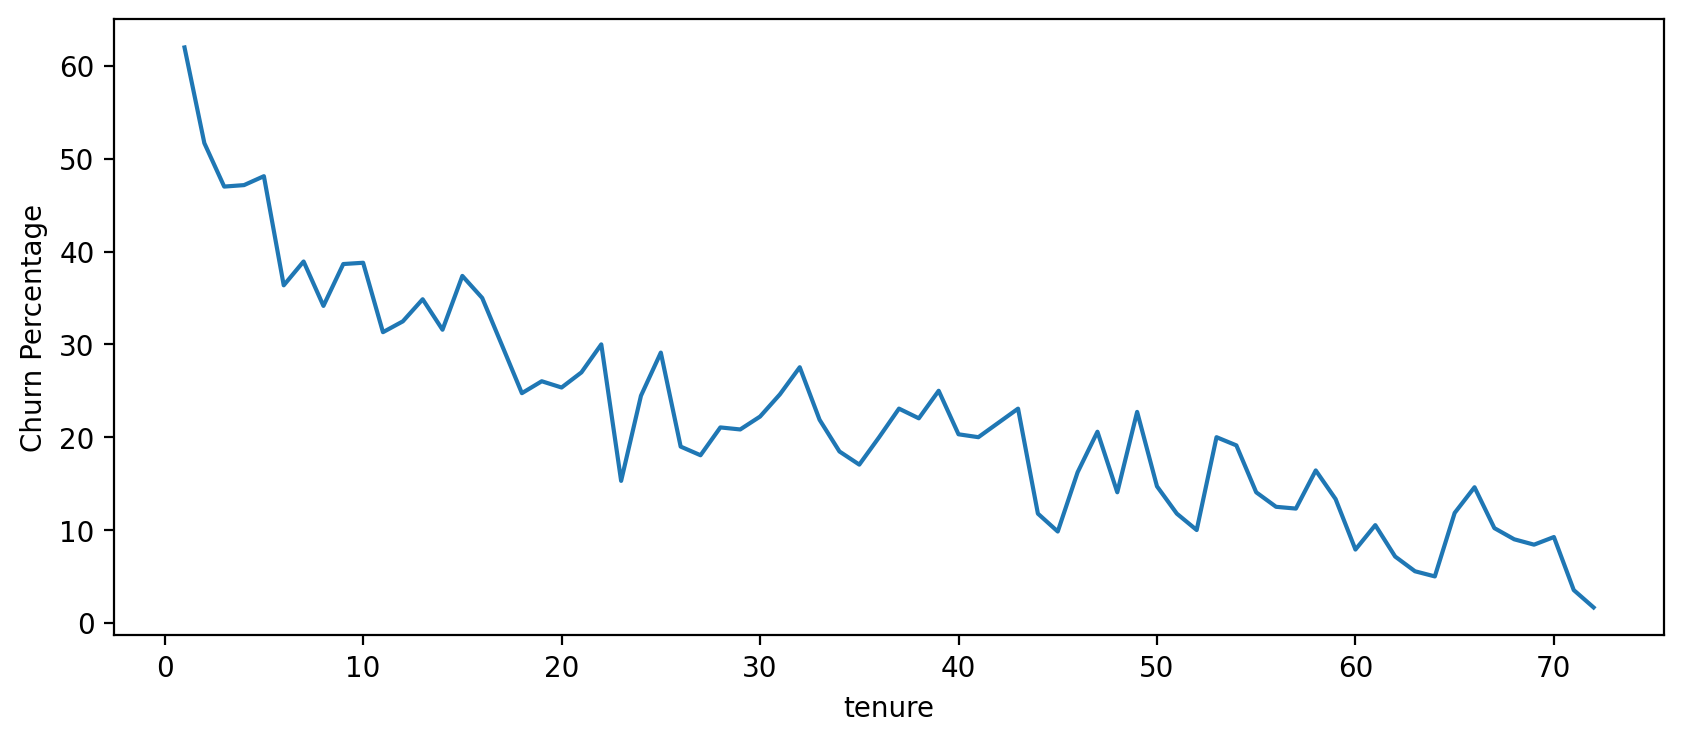

In [115]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

In [116]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [117]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [118]:
df.head(5)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

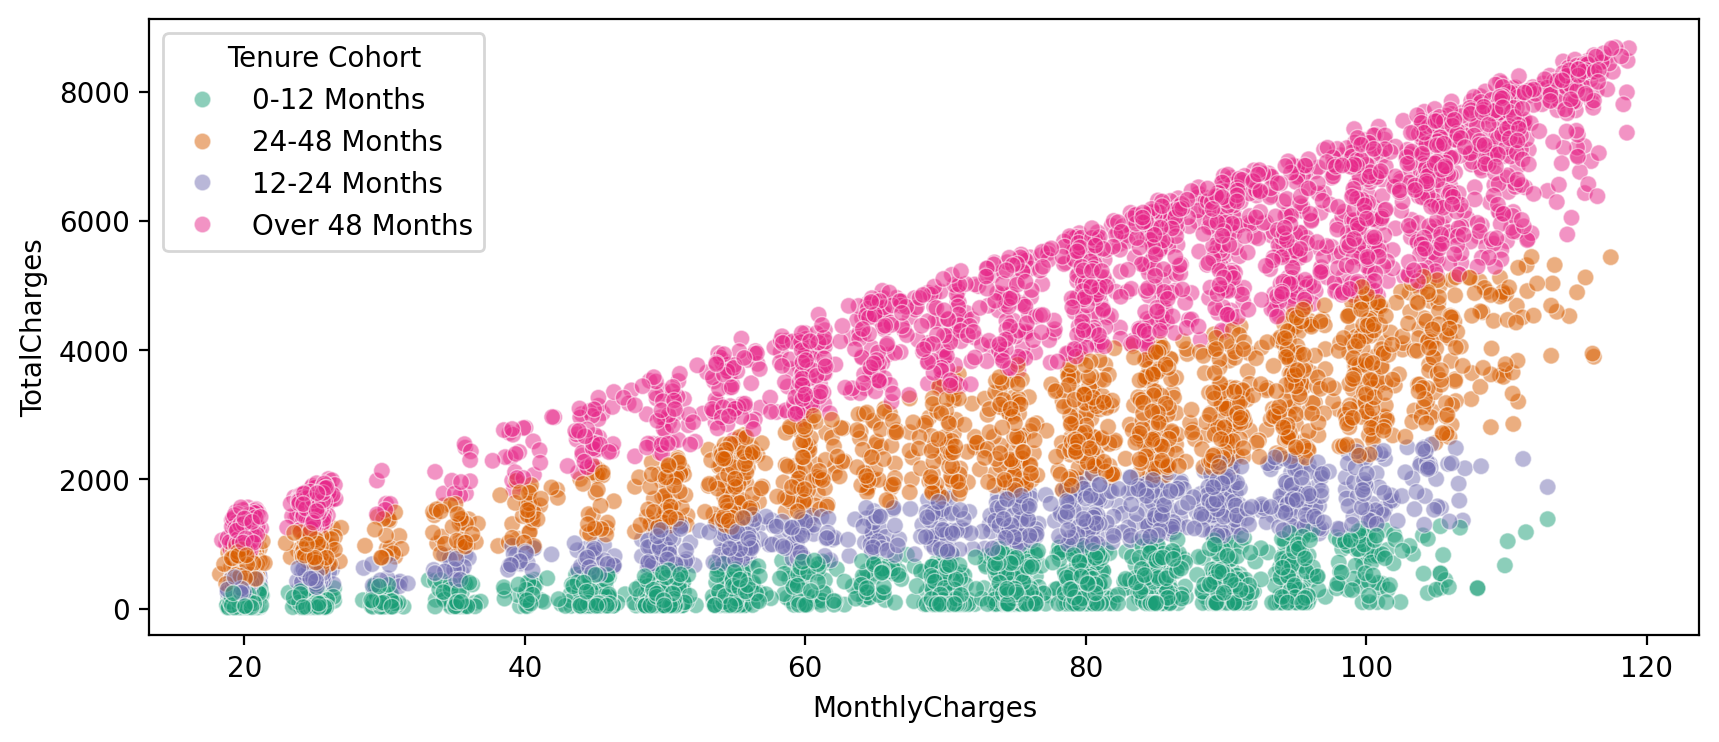

In [119]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2')

<Axes: xlabel='Tenure Cohort', ylabel='count'>

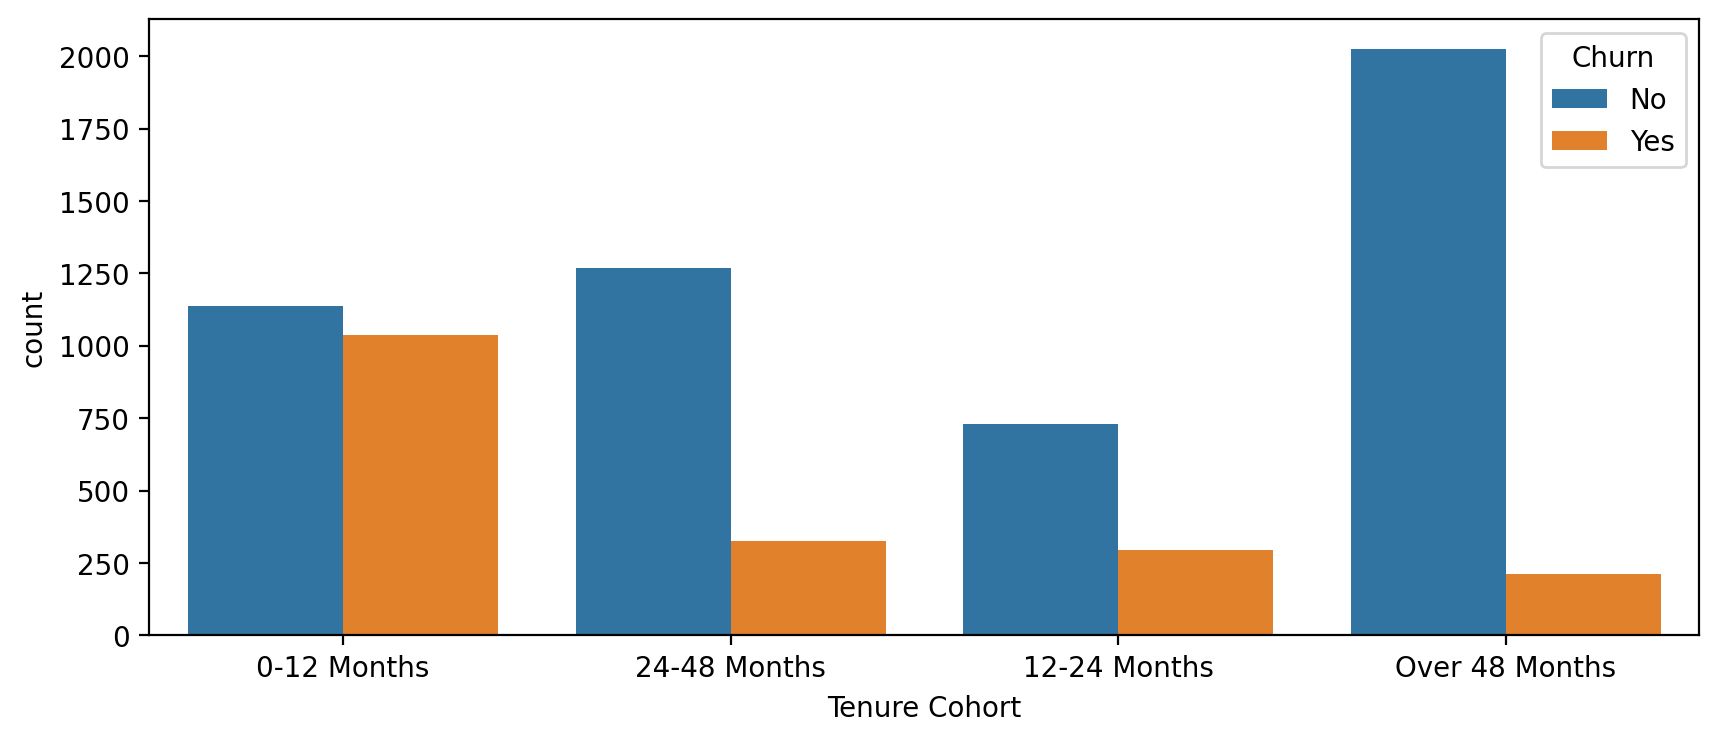

In [120]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

C:\Users\Mayank Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

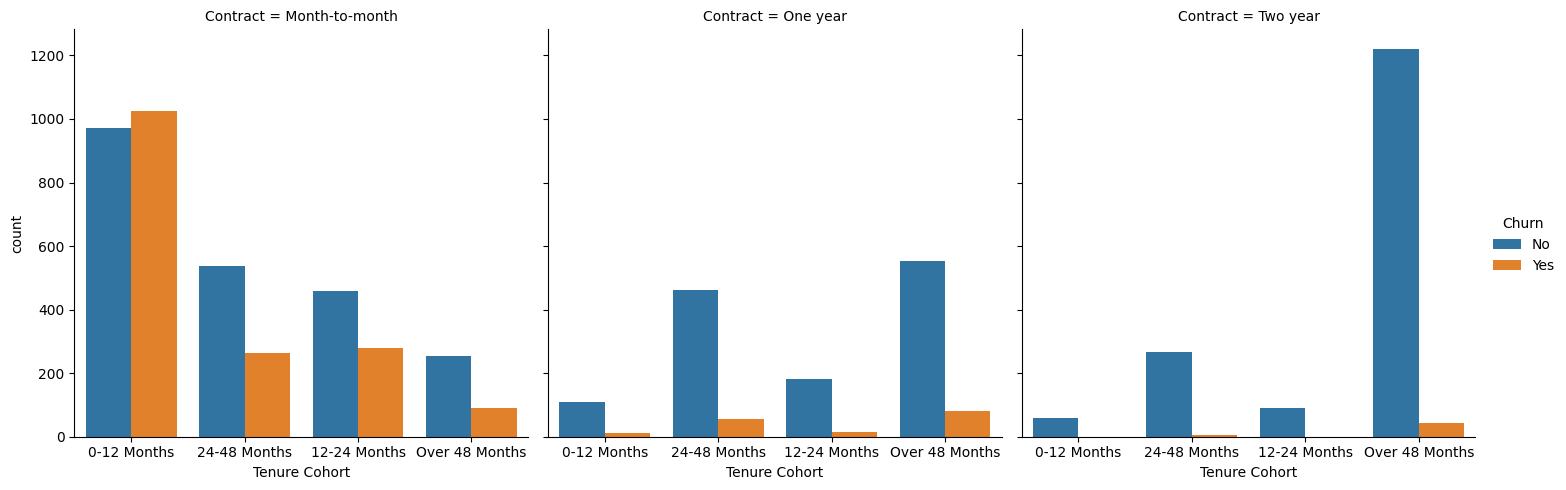

In [121]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')